In [2]:
#Esta librería es la combinación de numpy y matplotlib.
#No es necesario el poner np. y plt. , aunque si se hace no pasa nada.
from pylab import *

In [18]:
#x es la variable y N es el orden al que se quiere aproximar.
#Se usa la serie de Taylor. 
def my_sin(x,N):
    #Este es el contador para que pueda funcionar lo de x = x + 1 
    contador = 0
    for n in range(N+1):
        #Recuerda que: x+= es lo mismo que x=x+1.
        contador+= ((-1)**n )*( x**(2*n+1)/ math.factorial(2*n + 1) )
    return contador

In [19]:
my_sin(pi/4, 9)

0.7071067811865475

In [20]:
#Se puede crear un dominio en el que la función evalúe todos los puntos.
x = linspace(0, 2*pi) 
my_sin(x, 9)

array([ 0.        ,  0.12787716,  0.25365458,  0.375267  ,  0.49071755,
        0.59811053,  0.69568255,  0.78183148,  0.85514276,  0.91441262,
        0.95866785,  0.98718178,  0.99948622,  0.99537911,  0.97492791,
        0.93846842,  0.88659931,  0.82017225,  0.740278  ,  0.6482284 ,
        0.5455349 ,  0.43388374,  0.31510822,  0.19115863,  0.06407022,
       -0.06407022, -0.19115863, -0.31510822, -0.43388375, -0.54553492,
       -0.64822843, -0.74027807, -0.8201724 , -0.88659958, -0.93846893,
       -0.97492884, -0.99538079, -0.99948918, -0.98718697, -0.95867678,
       -0.91442777, -0.85516814, -0.78187347, -0.69575119, -0.59822147,
       -0.4908949 , -0.37554759, -0.25409407, -0.12855901, -0.00104818])

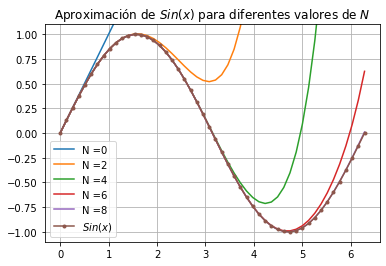

In [41]:
x = linspace(0, 2*pi) 
for i in range(0,10,2):
    plt.plot( x , my_sin(x,i), label= "N =%d" %i )

plot(x,sin(x),'.-',label = "$Sin(x)$")
title("Aproximación de $Sin (x)$ para diferentes valores de $N$")
ylim([-1.1 , 1.1]), grid(), legend()

show()    

In [43]:
def my_exp(x,N):
    resultado = 0
    for n in range(N+1):
        resultado += (x**n)/(math.factorial(n))
    
    return resultado

In [48]:
my_exp(1,10)

2.7182818011463845

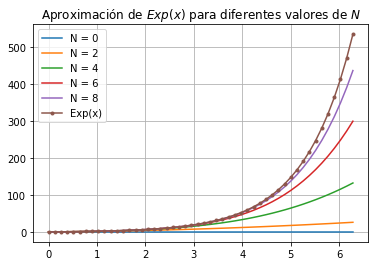

In [59]:
dominio = linspace(0,10)
for i in range(0,10,2):
    plot(x, my_exp(x,i), label ="N = %d" %i)

title("Aproximación de $Exp(x)$ para diferentes valores de $N$")
plot(x, exp(x), ".-", label = "Exp(x)")
grid(),legend()

show()

# Derivada numérica. Método de Euler.

In [3]:
from pylab import *

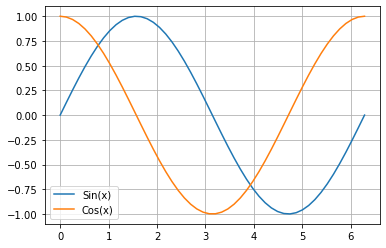

In [16]:
#Tanto x como y son arrays.
x = linspace(0,2*pi)
y = sin(x)
Dy = cos(x)

plot(x, y, label = "Sin(x)")
plot(x, Dy, label = "Cos(x)")
grid(), legend()
show()

### Con ayuda de la serie de Taylor se tiene lo siguiente:

$f(x_i + h) \approx f(x_i) + f'(x_i) h$

### Despejando el valor de $f'(x_i)$ se tiene lo siguiente:

$f'(x_i) \approx \displaystyle\frac{f(x_i + h) - f(x_i)}{h} $

### Tomando $h = x_{i+1} - x_{i}$ se tiene el valor de la derivada numérica.

$f'(x_i) \approx \displaystyle\frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_{i}} $


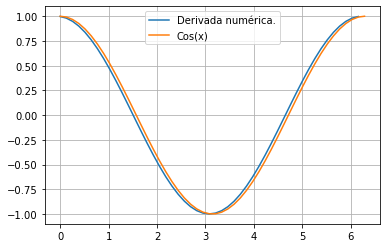

In [22]:
x = linspace(0,2*pi)
y = sin(x)
Dy = cos(x)

#Se generan listas llenas de ceros en las cuales se guardarán los valores de la derivada y dominio de ésta.
#No se están tomando los extremos del dominio.
x_d = zeros(len(x)-1)
y_d = zeros(len(x)-1)

#Nos enfocamos en la variable "y" porque es la función que queremos derivar.
for i in range(len(y)-1):
    #Date cuenta que estás encontrando la pendiente de la función en cada punto del dominio.
    m = (y[i+1] - y[i])/(x[i+1]-x[i])
    #En este punto se están guardando las pendientes junto con el dominio en las listas llenas de ceros.
    x_d[i] , y_d[i] = x[i] , m
    
#Se grafica la derivada numérica.
plot(x_d , y_d, label = "Derivada numérica.")
plot(x, Dy , label ="Cos(x)")
grid(), legend()
show()

In [27]:
#Para este caso se considera que x es un conjunto de valores, es decir x es el dominio.
#Se tienen valores en los cuales f es la imagen de la función.
def derivada_num(x, f):
    #Se hace una lista vacía para poder llenarla después.
    #Recuerda que el objetivo es obtener la derivada de f.
    f_prima = zeros(len(f))
    for i in range(len(f)-1):
        f_prima[i] = (f[i+1] - f[i])/(x[i+1] - x[i])
     
    #Se calcula el último punto de la derivada.
    f_prima[-1] = - ( f[-2]-f[-1] )/(x[1] - x[0])
    
    return f_prima

(None, <matplotlib.legend.Legend at 0x115a8fc8430>)

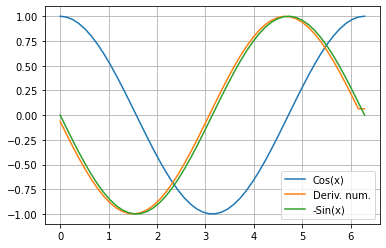

In [29]:
#Este es el dominio.
x = linspace(0,2*pi)
#Esta es la función.
y = cos(x)
Dy = -sin(x)
#Esta es la derivada numérica, es la función de la celda de arriba.
y_deriv_num = derivada_num(x , y)

plot(x , y , label = "Cos(x)")
plot(x , y_deriv_num, label = "Deriv. num.")
plot(x , Dy , label = "-Sin(x)")
grid(), legend()

# Integración numérica.

In [4]:
from pylab import *

## Primer algoritmo.
### Se puede obtener la integral de la siguiente forma:

$\displaystyle\int_{x_i - \frac{h}{2}}^{x_i + \frac{h}{2}} f(x) dx = \displaystyle\frac{f_{i + 1} + 22 f_{i} + f_{i-1}}{24} h  $

### Para los extremos se tiene: 

$\displaystyle\int_{x_0}^{x_0 + \frac{h}{2}} f(x) dx = 
\displaystyle\frac{h}{48} \left( 17f_{0} + 7f_{1} + f_{2} - f_{3} \right)$

$\displaystyle\int_{x_N - \frac{h}{2}}^{x_N} f(x) dx = 
\displaystyle\frac{h}{48} \left( 17f_{N} + 7f_{N-1} + f_{N-2} - f_{N-3} \right)$

In [20]:
#Nuevamente se tiene que x es el dominio y f es la función a evaluar y a integrar.
#Se tiene que considerar que tanto x como f son listas.
def integral_num (x, f):
    #Este es el contador inicial.
    integral = 0
    #Nótese que esta h es la misma para cada iteración pues se está partiendo el intervalo en pedazos iguales.
    h = x[1]-x[0]
    #Se realiza la primer integral.
    for i in range(1, len(f)-1):
        integral += (h/24)*(f[i+1] + 22*f[i] + f[i-1])
    
    #Para los extremos.
    #Lado izquierdo.
    integral += (h/48)*(17*f[0] + 7*f[1] + f[2] - f[3])
    #Lado derecho.
    integral += (h/48)*(17*f[-1] + 7*f[-2] + f[-3] - f[-4])
    
    return integral

In [21]:
x = linspace(0, pi)
y = sin(x)
integral_num(x , y)

2.000001590880302

# Ecuaciones diferenciales.

### Se resuelven ecuaciones que son de la forma: 

$ \displaystyle\frac{ d\vec{x} }{dt} = \vec{g}(\vec{x}, t) $ 

### Con condiciones iniciales de la forma: 

$ \vec{x}(0) = \vec{x}_{0}$



In [5]:
from pylab import*

## Método de Runge-Kutta de segundo orden. 

### Para este método se tiene lo siguiente:

$ \vec{x}_{n+1} = \vec{x}_{n} + \delta\vec{g}
\left( \vec{x}_{n} + \displaystyle\frac{1}{2} \vec{k}_{1} ,  
t_{n} + \displaystyle\frac{\delta}{2} \right)$

$ \vec{k}_{1} = \delta\vec{g}(\vec{x}_{n}, t_n)$

In [ ]:
def RK_2(edo, x_ini, t):
    #Zeros hace un array con len(t) listas cada una con len(x_ini) elementos.
    sol = zeros( (len(t) , len(x_ini)) )
    #En la primer entrada del array anterior se está guardando la condición inicial.
    sol[0,:] = x_ini
    #Se define el intervalo de tiempo:
    delta = t[1]-t[0]
    
    for i in range(0, len(t)-1):
        k1 = 

In [9]:
sol = zeros( (2,3) )
sol[0,:]

array([0., 0., 0.])

# Algunas cosas cool.

In [1]:
from pylab import *
from scipy.integrate import *

## Dipolo eléctrico. 

### El campo eléctrico de un dipolo se expresa de la siguiente manera: 

$
\vec{E} = \displaystyle\frac{q}{4\pi \epsilon_{0} }
\left(  
\displaystyle\frac{ x \hat{i} + y \hat{j} + (z-1) \hat{k} }
{\left( x^2 + y^2 + (z-1)^2 \right)^{3/2} }
+
\displaystyle\frac{ x \hat{i} + y \hat{j} + (z+1) \hat{k} }
{\left( x^2 + y^2 + (z+1)^2 \right)^{3/2} }
\right)
$ 

In [3]:
#Se necesitan como parametros el tiempo y la posción.
def dipolo(t,x):
    #Se están representando las coordenadas de los vectores como elementos de listas.
    #x[0]=x, x[1]=y, x[2] = z.
    
    #Estos son los denominadores de la expresión para E.
    r_mas = (x[0]**2 + x[1]**2 + (x[3]+1)**2)**(1.5)
    r_menos = (x[0]**2 + x[1]**2 + (x[3]-1)**2)**(1.5)
    
    #Coordenada x.
    dx = x[0]*( 1.0/(r_menos) + 1.0/(r_mas) )
    #Coordenada y.
    dy = x[1]*( 1.0/(r_menos) + 1.0/(r_mas) )
    #Coordenada z.
    dz = x[0]*( (x[2]-1)/(r_menos) + (x[2]+1)/(r_mas) )
    
    return array([dx,dy,dz])